<a href="https://colab.research.google.com/github/prajaktacodes/SparksGRIPInternship/blob/main/Task_2_Prediction_using_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:Prajakta Mayekar**

**Data Science & Business Analytics intern at The Sparks Foundation.**


---





From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

ALGORITHM USED - K-Means

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

Workflow behind Implemention of K-Means Clustering

Choose the number of clusters k

Select k random points from the data as centroids

Assign all the points to the closest cluster centroid

Recompute the centroids of newly formed clusters

Repeat steps 3 and 4

# TASK2 -
**Prediction using Unsupervised ML**

**Aim:**

Clustering of Iris dataset

**Flow of Analysis**
1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Building a clustering model

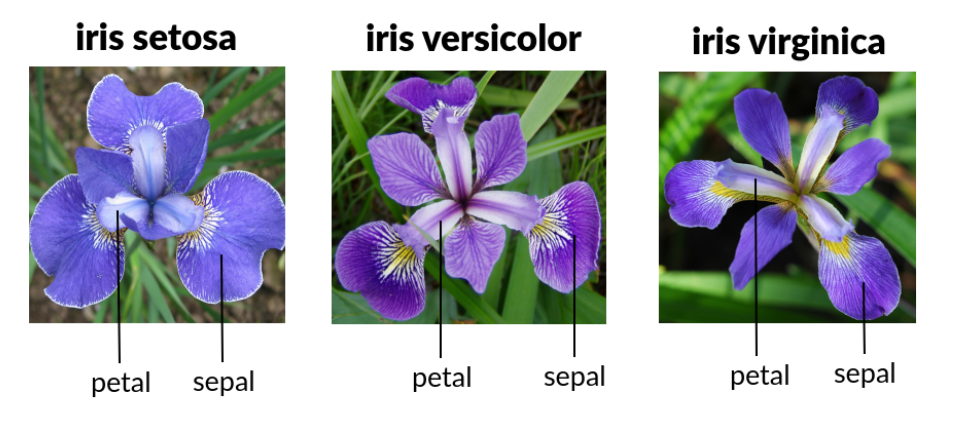

**Import the necessary libraries**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [72]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

**Read and understand the data**

In [73]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris.shape

(150, 6)

In [75]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Exploratory Data Analysis**

Missing Values : From the above basic analysis, we can see that the data is clean and there are no missing values.

Outliers Analysis and treatment

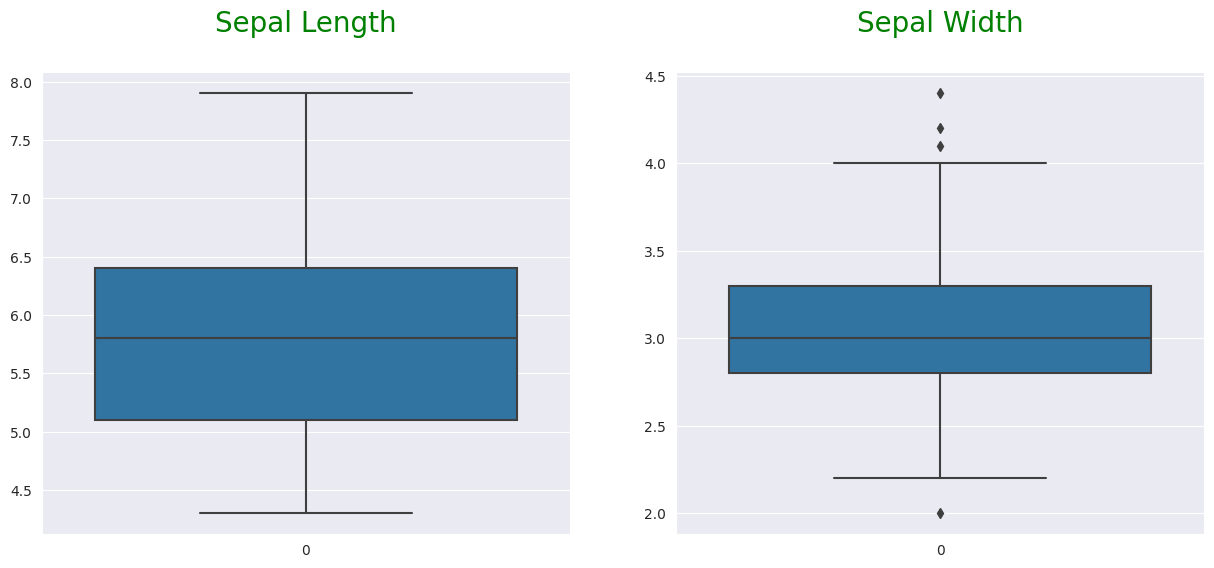

In [77]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(iris["SepalLengthCm"])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(iris["SepalWidthCm"])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

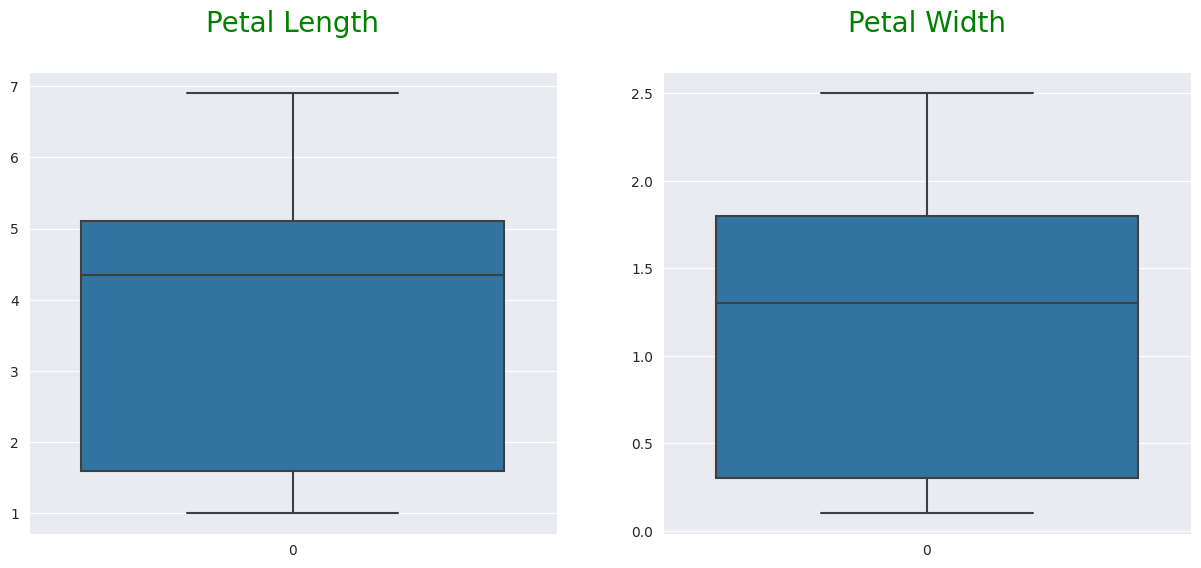

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(iris["PetalLengthCm"])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(iris["PetalWidthCm"])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Inference : There are no significant outliers in the data**

**Univariate Analysis**

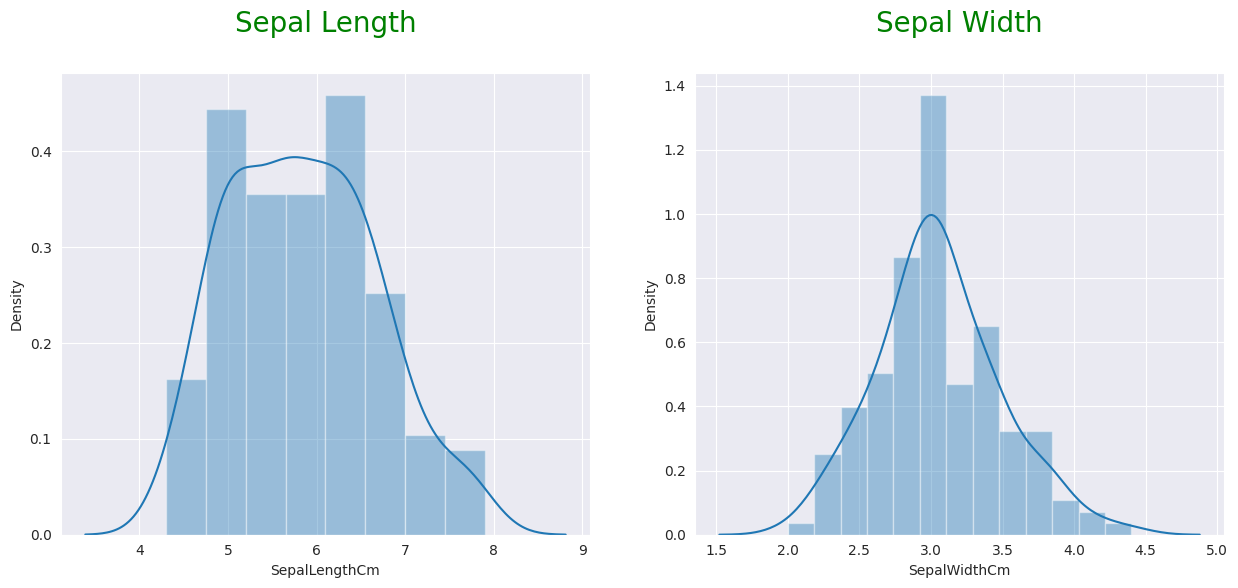

In [79]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(iris["SepalLengthCm"])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(iris["SepalWidthCm"])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

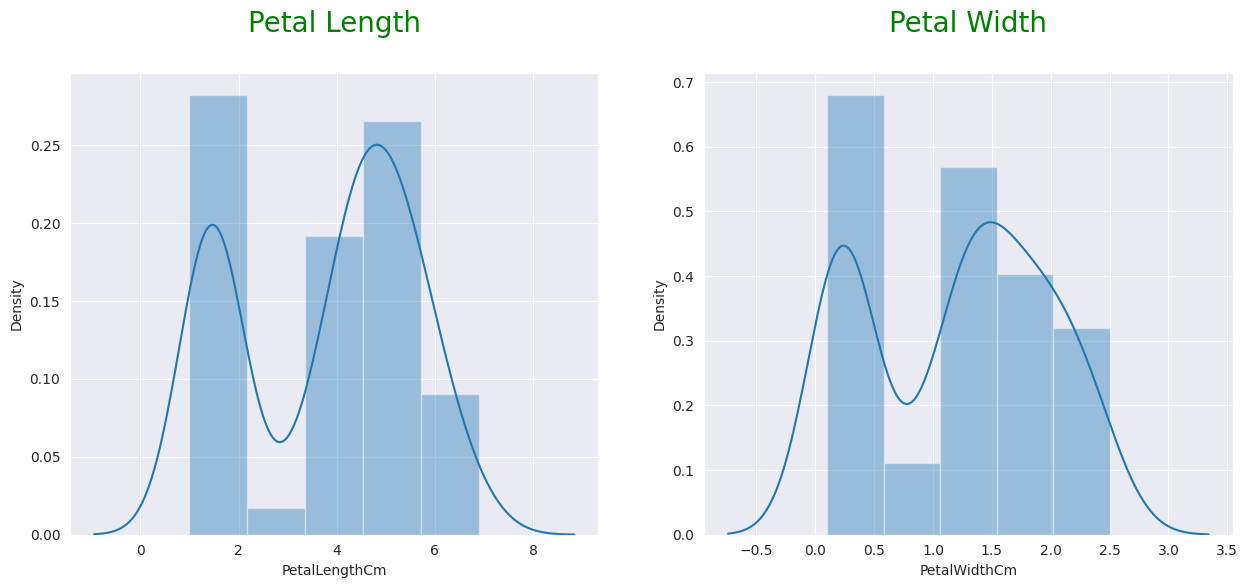

In [80]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(iris["PetalLengthCm"])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(iris["PetalWidthCm"])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Bivariate and Multivariate analysis**

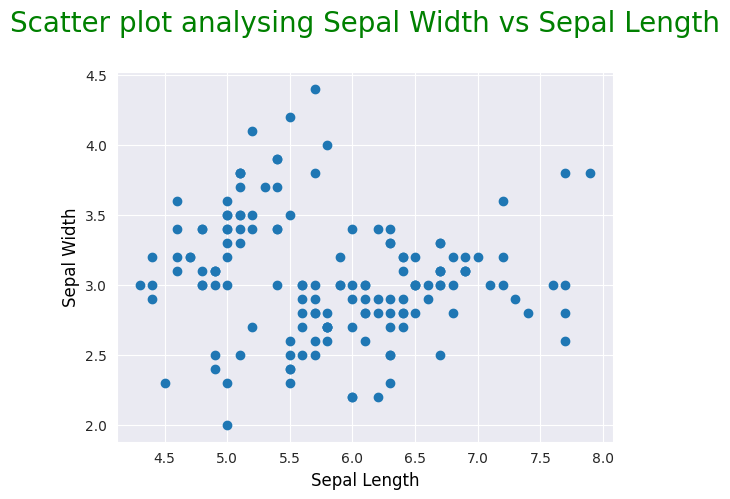

In [81]:
# Sepal Width vs Sepal Length
plt.scatter(iris["SepalLengthCm"], iris["SepalWidthCm"])
plt.title("Scatter plot analysing Sepal Width vs Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Sepal Length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Sepal Width", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

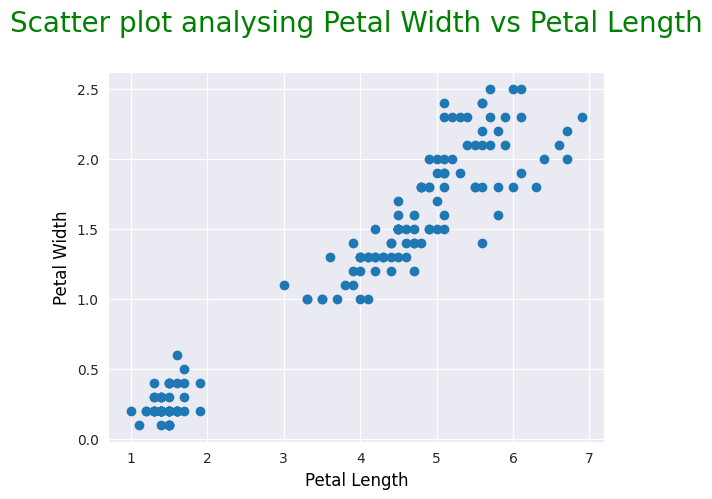

In [82]:
# Sepal Width vs Sepal Length
plt.scatter(iris["PetalLengthCm"], iris["PetalWidthCm"])
plt.title("Scatter plot analysing Petal Width vs Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Petal Length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Petal Width", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

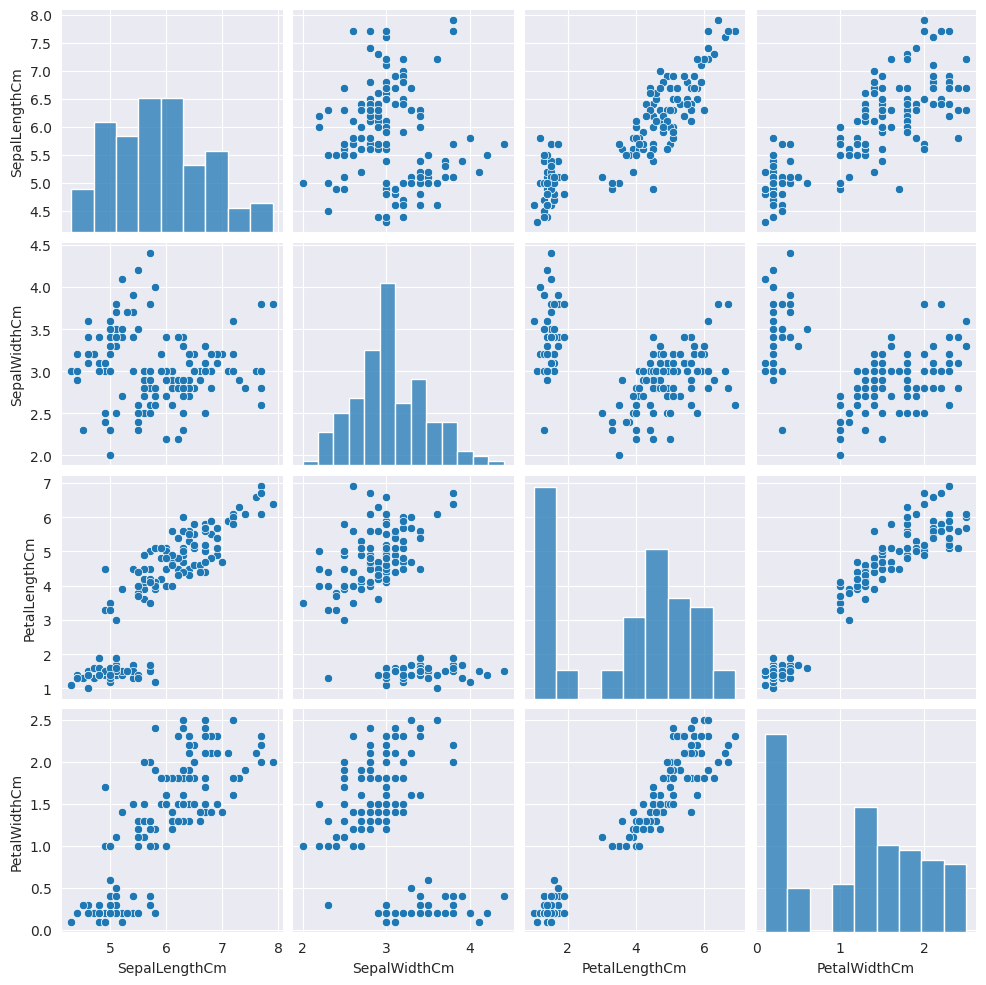

In [83]:
# Sepal Length, Sepal Width, Petal Length, Petal Width
sns.pairplot(data = iris, vars = ["SepalLengthCm","SepalWidthCm","PetalLengthCm", "PetalWidthCm"])
plt.show()

**Building a clustering model**

**Let's form a new data frame with required variables**

In [84]:
iris_new = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm", "PetalWidthCm"]]


In [85]:
iris_new.shape


(150, 4)

**Scaling of variables**

In [86]:
scaler = StandardScaler()

In [87]:
iris_new_scaled = scaler.fit_transform(iris_new)

In [88]:
iris_new_scaled.shape


(150, 4)

In [89]:
iris_new_scaled = pd.DataFrame(iris_new_scaled)

In [90]:
iris_new_scaled.columns = ["Sepal_Length(cm)", "Sepal_Width(cm)", "Petal_Lenth(cm)", "Petal_Width(cm)"]


In [91]:
iris_new_scaled.head()

,Sepal_Length(cm),Sepal_Width(cm),Petal_Lenth(cm),Petal_Width(cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Check whether data is good for clustering - Hopkins score**

In [92]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [93]:
hopkins(iris_new_scaled)

0.84385529700989

**Inference : Since the hopkins score is above 80% most of the times after running the function, we infer that the data is fit for clustering**

**K-Means Clustering**

**Finding optimal number of clusters**

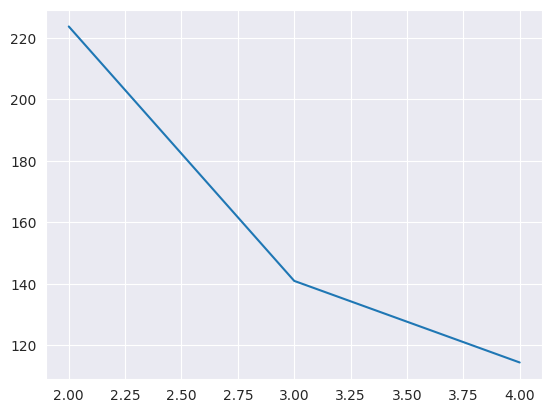

In [94]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_new_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)
plt.show()

In [95]:
# silhouette analysis
range_n_clusters = [2, 3, 4]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_new_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(iris_new_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4608959832660513
For n_clusters=4, the silhouette score is 0.38495557913298484


**Inference : We will go ahead with 3 clusters - k = 3**

In [96]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(iris_new_scaled)

KMeans(max_iter=50, n_clusters=3)

In [97]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [98]:
iris_new["cluster_id"] = kmeans.labels_

In [99]:
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


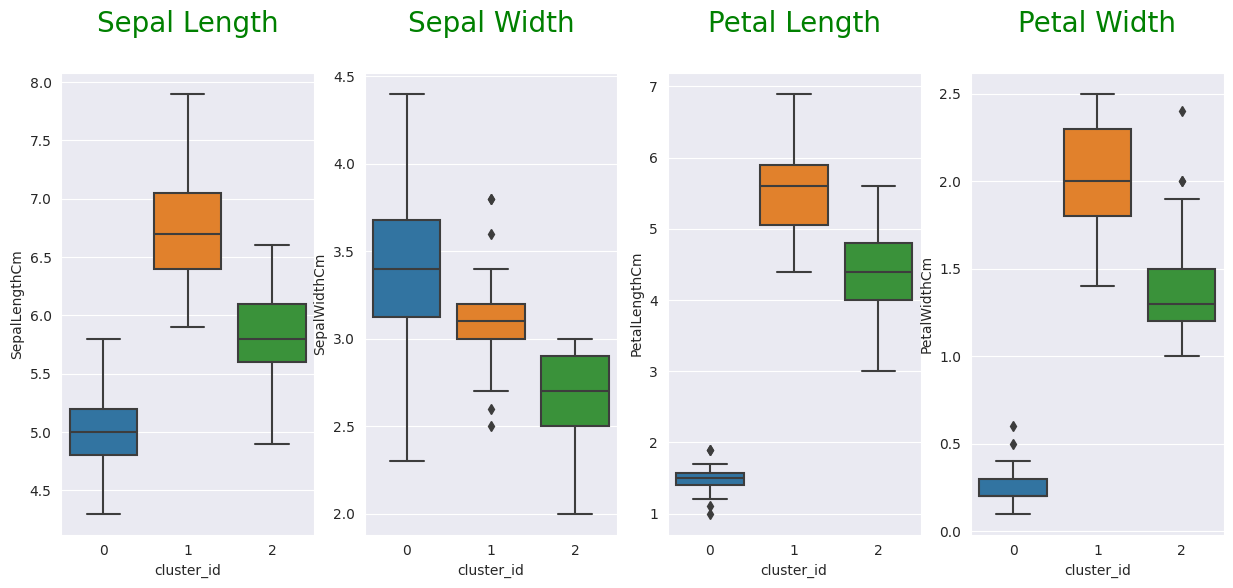

In [100]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(y = iris_new['SepalLengthCm'], x = iris_new['cluster_id'])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.boxplot(y = iris_new['SepalWidthCm'], x = iris_new['cluster_id'])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,3)
sns.boxplot(y = iris_new['PetalLengthCm'], x = iris_new['cluster_id'])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,4)
sns.boxplot(y = iris_new['PetalWidthCm'], x = iris_new['cluster_id'])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

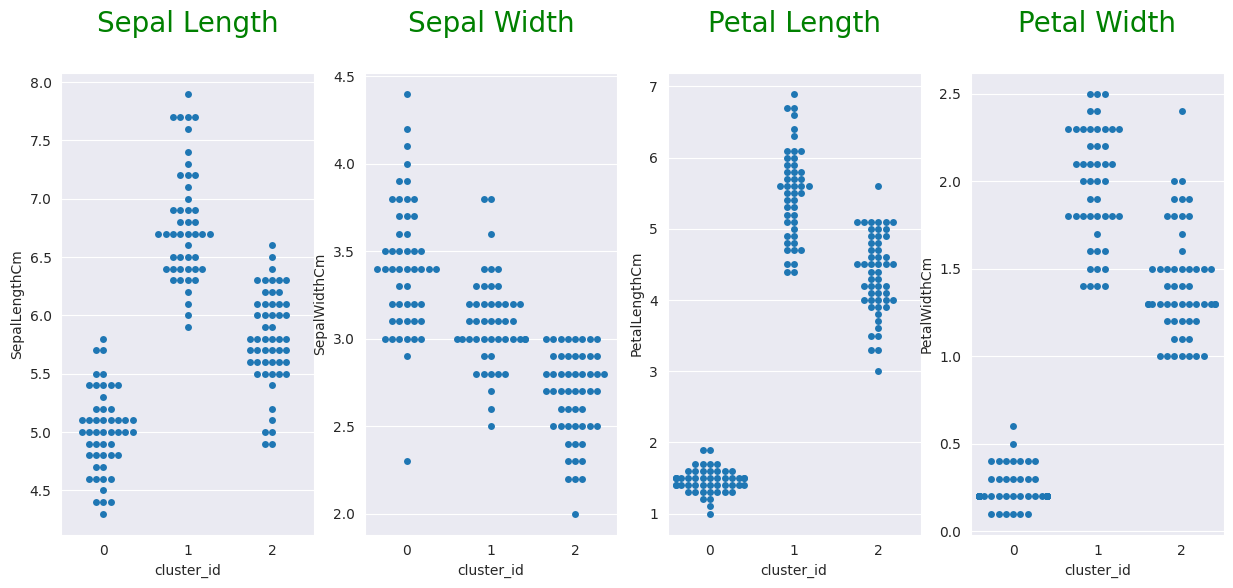

In [101]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.swarmplot(y = iris_new['SepalLengthCm'], x = iris_new['cluster_id'])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.swarmplot(y = iris_new['SepalWidthCm'], x = iris_new['cluster_id'])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,3)
sns.swarmplot(y = iris_new['PetalLengthCm'], x = iris_new['cluster_id'])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,4)
sns.swarmplot(y = iris_new['PetalWidthCm'], x = iris_new['cluster_id'])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Following are the 3 clusters formed** :

cluster no. 0 : moderate Sepal Length, large sepal width, small petal length, small petal width.

cluster no. 1 : large sepal length, moderate sepal width, large petal length, large petal width

cluster no. 2 : moderate sepal length, small sepal width, moderate petal length, moderate petal width

**Hierarchical Clustering**

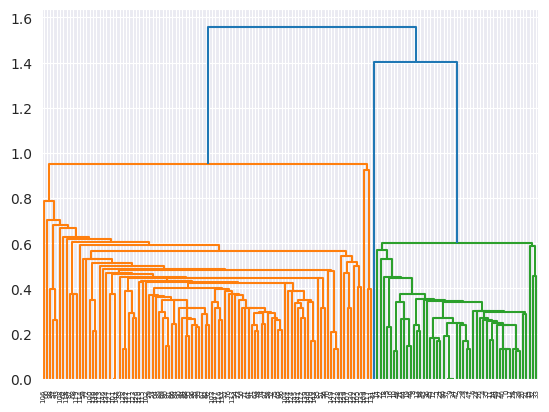

In [102]:
# single linkage
mergings = linkage(iris_new_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

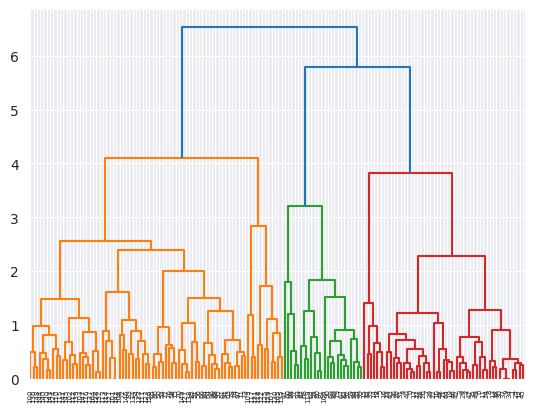

In [103]:
# complete linkage
mergings = linkage(iris_new_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [104]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
iris_new["cluster_labels"] = cluster_labels

In [106]:
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id,cluster_labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


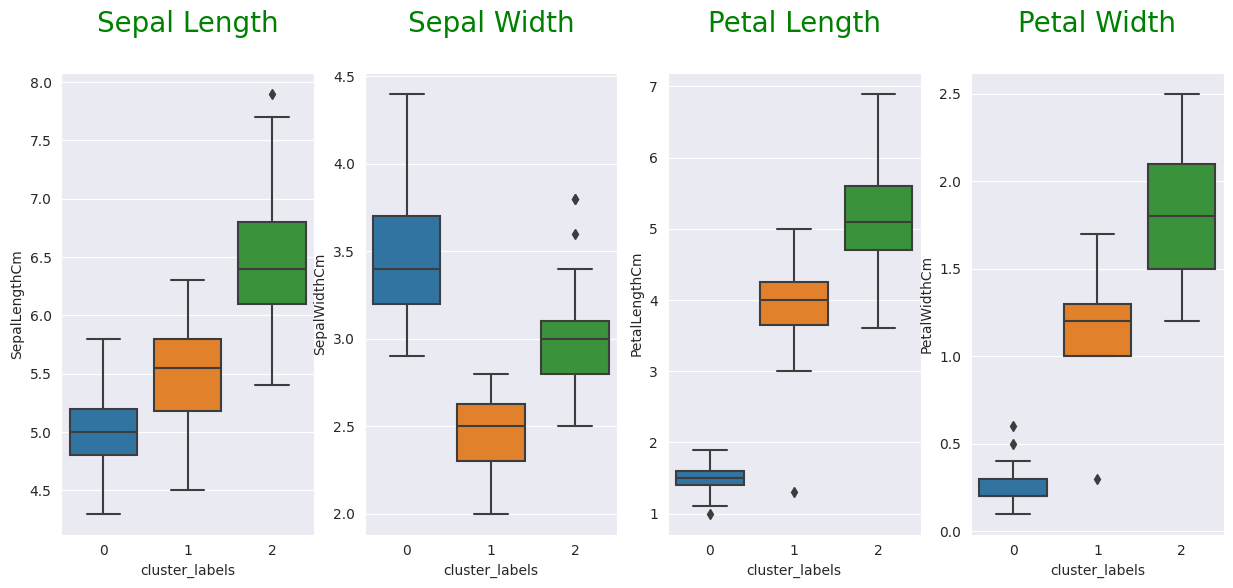

In [107]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(y = iris_new['SepalLengthCm'], x = iris_new['cluster_labels'])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.boxplot(y = iris_new['SepalWidthCm'], x = iris_new['cluster_labels'])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,3)
sns.boxplot(y = iris_new['PetalLengthCm'], x = iris_new['cluster_labels'])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,4)
sns.boxplot(y = iris_new['PetalWidthCm'], x = iris_new['cluster_labels'])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

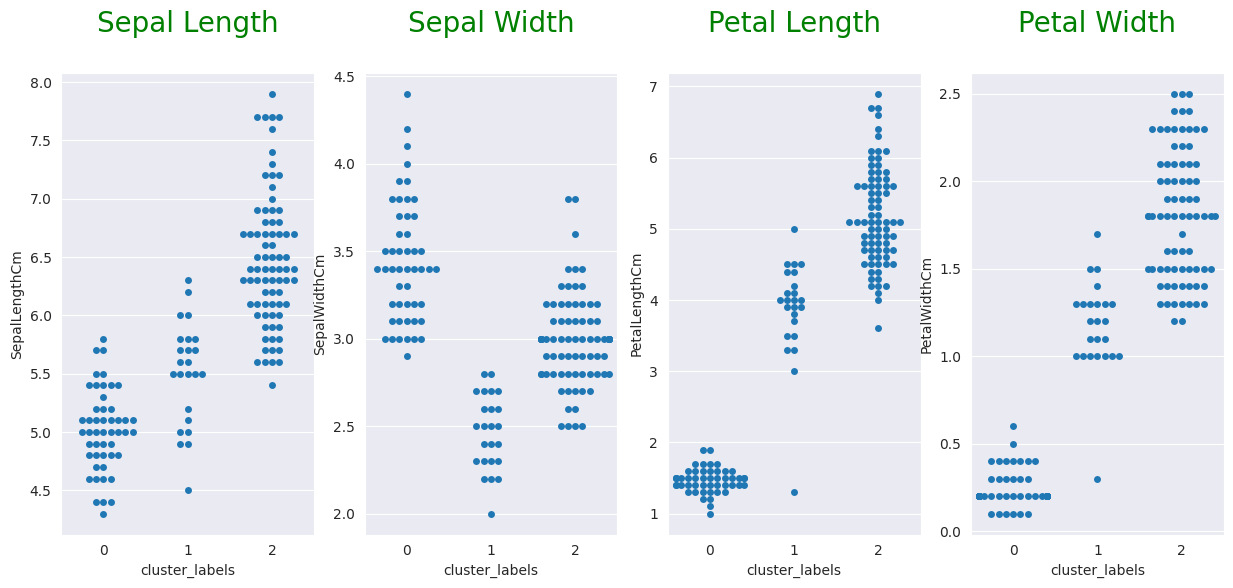

In [108]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.swarmplot(y = iris_new['SepalLengthCm'], x = iris_new['cluster_labels'])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.swarmplot(y = iris_new['SepalWidthCm'], x = iris_new['cluster_labels'])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,3)
sns.swarmplot(y = iris_new['PetalLengthCm'], x = iris_new['cluster_labels'])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,4)
sns.swarmplot(y = iris_new['PetalWidthCm'], x = iris_new['cluster_labels'])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Following are the 3 clusters formed :**

cluster no. 0 : small Sepal Length, large sepal width, small petal length, small petal width.

cluster no. 1 : moderate sepal length, small sepal width, moderate petal length, moderate petal width

cluster no. 2 : large sepal length, moderate sepal width, large petal length, large petal width



---



# Our Analysis is Complete.